# Heat equation solver with Finite Difference Method

https://en.wikipedia.org/wiki/Finite_difference_method#Example:_The_Laplace_operator

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1-d Heat equation

In [19]:
n_points = 500
n_timesteps = 1000
r = 0.5

# Temperature
T = np.zeros((n_timesteps, n_points,))
# Initial conditions
T[0, (n_points//4):(3*n_points//4)] = 1.0

This is a forward difference solution. It's only stable for 0 < r <= 0.5.

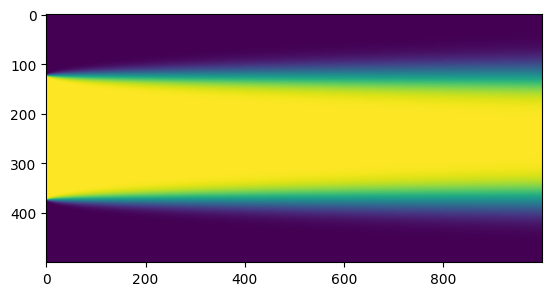

In [20]:
for t in range(0, n_timesteps-1):
    for n in range(1, n_points-1): # first and last are stationary
        T[t+1, n] = T[t, n] + r * (T[t, n+1] + T[t, n-1] - 2 * T[t, n])

plt.imshow(T.T)

Let's now implement a backward difference solution. This one is numerically stable for all r > 0.

We'll have to solve a linear system of the form Ax = b

In [6]:
A = np.zeros((n_points, n_points))
# Periodic boundary conditions
A[0, 0] = 1 + 2 * r
A[0, 1] = -r
A[0, -1] = -r

A[-1, -1] = 1 + 2 * r
A[-1, -2] = -r
A[-1, 0] = -r
for n in range(1, n_points-1):
    A[n, n-1] = -r
    A[n, n] = 1 + 2 * r
    A[n, n+1] = -r

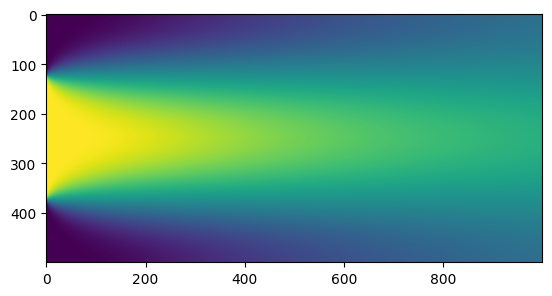

In [12]:
for t in range(1, n_timesteps):
    b = T[t-1, :]
    x = np.linalg.solve(A, b)
    T[t, :] = x

plt.imshow(T.T)

## 2-d Heat equation